IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
from sklearn.model_selection import KFold

CREATE kNN CLASS

In [2]:
def euclideian(x1, x2):
    #calculate the euclideian distance between different observations
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k):
        #Set the number of neighbours
        self.k = k
    
    def fit(self, X_train, y_train):
        #fit the classifier by loading the labeled training data
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        #predict the class of testing data x using the method _predict
        predictions = [self._predict(x) for x in X]

        return predictions
    
    def _predict(self, x):
        #compute the euclideian distance between testing data and training data
        distances = [euclideian(x, x_train) for x_train in self.X_train]
        
        #find the first k indices of the training points 
        #that are the closest to the testing point
        k_indices = np.argsort(distances)[:self.k]

        #store the labels of the k closest training points
        k_nearest_labels = [self.y_train[i] for i  in k_indices]
        
        #choose as predicted label the most common label 
        #out of the k closest training points
        most_common = Counter(k_nearest_labels).most_common()[0][0]
        return most_common

LOAD DRIVE

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


LOAD DATA

<ipython-input-4-5f82c8fbde71>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('data.jpg', bbox = 'tight', dpi = 400)


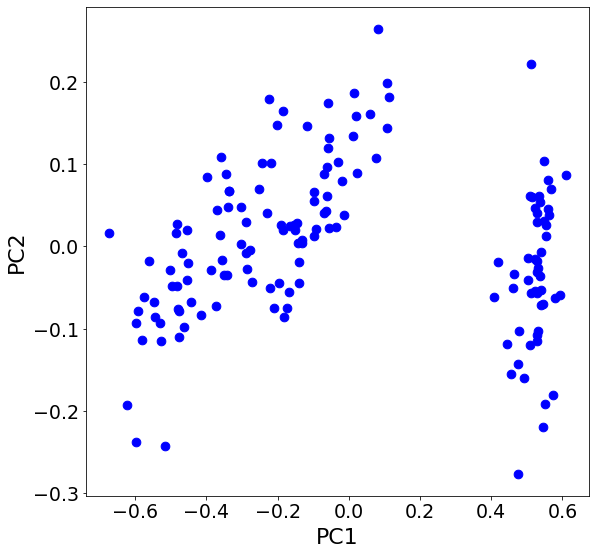

In [4]:
path = '/content/drive/My Drive/Colab Notebooks/ESC597/Clustering/'

data = np.loadtxt('{}data_iris2.txt'.format(path))
X = data
info = np.loadtxt('{}info_iris2.txt'.format(path))
y = info
plt.figure(figsize = (9, 9))
plt.scatter(X[:,0], X[:,1], color = 'blue', s = 75)
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('PC1', labelpad = 6, fontsize = 22)
plt.ylabel('PC2', labelpad = 6, fontsize = 22)
plt.savefig('data.jpg', bbox = 'tight', dpi = 400)

CREATE TRAIN,VALIDATION AND TEST DATASETS

In [5]:
seed = 1234 #Define random seed for the shuffling of data
test_size = 0.2 #Define the percentage of testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, shuffle=True)

SCALE THE DATA

In [6]:
scaler = MinMaxScaler((-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

APPLY CROSS VALIDATION TO FIND OPTIMAL VALUE OF k

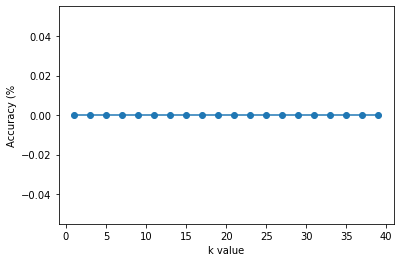

In [7]:
#Define a range for the number of K-neighbours
k_range = np.linspace(1, 39, int((39+1) / 2), dtype = 'int')

#Define the k-fold object to split the training dataset
kf = KFold(n_splits=10)

#Apply the spliting to our data and get an interable object that contains
#the indices of the respective training and validation set 
#in the form (train_index, val_index)
total_acc = []
for k in k_range:
    acc = 0
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        #initilialize the classifier by providing the number of K-neighbours
        classifier = KNN(k)

        #fit the training data in the classifier
        classifier.fit(X_train[train_index], y_train[train_index])

        #complete the code
        
    
    total_acc.append(acc / (i+1))

plt.plot(k_range, total_acc, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy (%')
plt.savefig('Cross-validation plot.jpg', dpi=400)


INITIALIZE kNN CLASSIFIER

In [8]:
k = 5
classifier = KNN(k)
classifier.fit(X_train, y_train)

MAKE PREDICTIONS

CALCULATE ACCURACY

CREATE CONFUSION MATRIX